In [1]:
import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Devise

In [2]:
from fastai.conv_learner import *
torch.backends.cudnn.benchmark=True

import fastText as ft

In [3]:
import torchvision.transforms as transforms

In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

tfms = transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

/home/jason/anaconda3/envs/fastai/lib/python3.6/site-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [5]:
fname = 'val/ILSVRC2012_val_00007197.JPEG'

In [6]:
BASE_PATH = Path('data/imagenet/')
PATH = BASE_PATH/'ILSVRC/Data/CLS-LOC/'
TMP_PATH = PATH/'tmp'
TRANS_PATH = Path('data/translate/')
PATH_TRN = PATH/'train'

In [7]:
img = Image.open(PATH/fname)

In [8]:
import fastai

In [9]:
fastai.dataloader.DataLoader

fastai.dataloader.DataLoader

In [10]:
arch=resnet50
ttfms,vtfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1)
def to_array(x,y): return np.array(x).astype(np.float32)/255,None
def TT(x,y): return torch.from_numpy(x),None

ttfms.tfms = [to_array] + ttfms.tfms# + [TT]

In [11]:
ttfms(img)

array([[[-0.36095, -0.66868, -0.08206, ..., -0.21349, -0.40457, -0.56398],
        [ 0.40854, -0.32987, -0.27467, ..., -0.32476, -0.63414, -0.6117 ],
        [-0.06004, -0.35482, -0.32402, ..., -0.25758, -1.0105 , -0.85064],
        ...,
        [-0.74302, -0.90626, -0.22425, ...,  1.46294,  1.48465,  1.80036],
        [-0.65056, -1.04742, -0.86151, ...,  1.16354,  1.15419,  1.15603],
        [-0.95725, -0.86917, -1.00378, ...,  0.48215,  0.62322,  0.26703]],

       [[ 0.19564, -0.11659,  0.19178, ...,  0.22315,  0.05828, -0.12158],
        [ 0.71062,  0.12907,  0.24652, ..., -0.12472, -0.42676, -0.28628],
        [ 0.50692,  0.27949,  0.33311, ...,  0.07956, -0.74335, -0.63517],
        ...,
        [-0.72627, -0.72886, -0.29398, ...,  1.81012,  1.83389,  2.16761],
        [-0.36265, -0.72542, -0.67904, ...,  1.5183 ,  1.51834,  1.54153],
        [-0.54849, -0.3519 , -0.45175, ...,  0.85961,  1.05212,  0.71655]],

       [[-0.83823, -1.14062, -0.66761, ..., -0.94476, -1.10508, -1.148

In [12]:
ft_vecs = ft.load_model(str((TRANS_PATH/'wiki.en.bin')))

In [13]:
ft_vecs.get_word_vector('king')

array([ 0.03259, -0.18164, -0.29049, -0.10506, -0.16712, -0.07748, -0.5661 , -0.08622, -0.00216,  0.15366,
        0.12189, -0.14722,  0.01511,  0.07209, -0.02156, -0.20612, -0.02104, -0.01999, -0.15506,  0.00802,
       -0.22746,  0.33518, -0.10629, -0.50318, -0.1582 ,  0.27829,  0.05752, -0.32697,  0.04766,  0.01076,
        0.13972, -0.12445, -0.18989,  0.32969, -0.32513,  0.10958,  0.21962, -0.47215,  0.03422, -0.2207 ,
        0.02177,  0.0832 , -0.04776, -0.48873,  0.05207, -0.15001, -0.19203,  0.06177,  0.15535, -0.05598,
        0.11071,  0.39161, -0.17716,  0.05449,  0.25898, -0.13954,  0.4272 , -0.07273, -0.4714 ,  0.04993,
        0.29526, -0.05319,  0.03451, -0.10583, -0.30137,  0.16372,  0.07541,  0.21018, -0.11459,  0.10976,
        0.04923,  0.17688,  0.45658, -0.59762, -0.0039 ,  0.08866,  0.53103,  0.153  , -0.1673 ,  0.13121,
       -0.05547, -0.03582, -0.34535,  0.09128,  0.03323,  0.45211, -0.16894,  0.21139,  0.24153,  0.51014,
       -0.01474, -0.47179,  0.2235 , 

In [14]:
np.corrcoef(ft_vecs.get_word_vector('jeremy'), ft_vecs.get_word_vector('Jeremy'))

array([[1.     , 0.60866],
       [0.60866, 1.     ]])

In [15]:
np.corrcoef(ft_vecs.get_word_vector('banana'), ft_vecs.get_word_vector('Jeremy'))

array([[1.     , 0.14482],
       [0.14482, 1.     ]])

### Map imagenet classes to word vectors

In [53]:
ft_words = ft_vecs.get_words(include_freq=True)
ft_word_dict = {k:v for k,v in zip(*ft_words)}
ft_words = sorted(ft_word_dict.keys(), key=lambda x: ft_word_dict[x])

len(ft_words)

2519370

In [54]:
from fastai.io import get_data

In [55]:
CLASSES_FN = 'imagenet_class_index.json'
get_data(f'http://files.fast.ai/models/{CLASSES_FN}', TMP_PATH/CLASSES_FN)

In [56]:
WORDS_FN = 'classids.txt'
get_data(f'http://files.fast.ai/data/{WORDS_FN}', PATH/WORDS_FN)

In [57]:
class_dict = json.load((TMP_PATH/CLASSES_FN).open())
classids_1k = dict(class_dict.values())
nclass = len(class_dict); nclass

1000

In [58]:
class_dict['0']

['n01440764', 'tench']

In [59]:
classid_lines = (PATH/WORDS_FN).open().readlines()
classid_lines[:5]

['n00001740 entity\n',
 'n00001930 physical_entity\n',
 'n00002137 abstraction\n',
 'n00002452 thing\n',
 'n00002684 object\n']

In [60]:
classids = dict(l.strip().split() for l in classid_lines)
len(classids),len(classids_1k)

(82115, 1000)

In [ ]:
lc_vec_d = {w.lower(): ft_vecs.get_word_vector(w) for w in ft_words[-1000000:]}

In [ ]:
syn_wv = [(k, lc_vec_d[v.lower()]) for k,v in classids.items()
          if v.lower() in lc_vec_d]
syn_wv_1k = [(k, lc_vec_d[v.lower()]) for k,v in classids_1k.items()
          if v.lower() in lc_vec_d]
syn2wv = dict(syn_wv)
len(syn2wv)

In [ ]:
pickle.dump(syn2wv, (TMP_PATH/'syn2wv.pkl').open('wb'))
pickle.dump(syn_wv_1k, (TMP_PATH/'syn_wv_1k.pkl').open('wb'))

In [16]:
syn2wv = pickle.load((TMP_PATH/'syn2wv.pkl').open('rb'))
syn_wv_1k = pickle.load((TMP_PATH/'syn_wv_1k.pkl').open('rb'))

In [18]:
SYNSET_ID = 'synsetId'

In [17]:
pd.set_option('display.max_colwidth', -1)

In [24]:
val_img2solution_df = pd.read_csv(f'{BASE_PATH}/LOC_val_solution.csv', low_memory=False)
val_img2solution_df[SYNSET_ID]=val_img2solution_df['PredictionString'].str.split(pat=' ').str[0]

val_img2solution_df['FilePath'] = str(PATH/'val')
val_img2solution_df['FilePath'] = val_img2solution_df['FilePath'] + '/' + val_img2solution_df['ImageId'] + '.JPEG'
val_img2solution_df['FilePath'] = val_img2solution_df['FilePath'].map(os.path.abspath)
#val_img2solution_df['FileExists'] = val_img2solution_df['FilePath'].map(os.path.isfile)
#val_img2solution_df = val_img2solution_df[val_img2solution_df['FileExists']]
val_img2solution_df['ImageVec'] = val_img2solution_df[SYNSET_ID].map(syn2wv)
val_img2solution_df = val_img2solution_df[~val_img2solution_df['ImageVec'].isnull()]
val_img2solution_df.head()

,ImageId,PredictionString,synsetId,FilePath,ImageVec
1,ILSVRC2012_val_00037956,n03481172 131 0 499 254,n03481172,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00037956.JPEG,"[0.26336944, 0.07644474, -0.10415195, 0.4791309, 0.22323433, 0.11795869, -0.07446376, 0.18407466, 0.1687962, 0.4876957, -0.22483477, 0.073852874, 0.09106361, -0.19331594, 0.06909811, -0.39218098, 0.31787163, -0.037351865, -0.3990055, 0.43350974, -0.15267596, -0.16036347, 0.009712555, -0.25598803, -0.4750534, 0.055549044, -0.47972614, 0.3840446, 0.31869784, 0.25903767, -0.1981041, 0.4251084, -0.20601368, -0.020940157, -0.06727068, 0.042302836, -0.35956535, -0.28575954, 0.31829262, -0.17377742, -0.2321226, 0.0620939, 0.0026241478, 0.3113695, -0.082904205, -0.30256328, 0.009152855, 0.1291847, 0.33078507, -0.028532367, -0.020506179, -0.09606489, -0.30402276, 0.19452831, -0.024186183, -0.008551416, 0.25107977, 0.60862863, -0.030332355, -0.032794803, -0.026570791, 0.14799231, 0.17109764, 0.035852317, -0.012858416, 0.104260735, 0.43496308, 0.3704151, 0.17610852, -0.17956175, 0.59922665, -0.2518732, -0.22930516, 0.34367993, 0.048038572, -0.19422042, -0.10670854, -0.049984466, -0.26345378, -0.512115, -0.07833042, -0.094095305, -0.4602446, 0.22571933, -0.34653836, 0.14272122, 0.009927633, -0.11477812, 0.47490758, 0.21640517, -0.021481326, -0.12953444, 0.05432714, -0.2848917, 0.004890536, 0.3453882, -0.5837476, 0.106617965, -0.08916598, 0.070727184, ...]"
2,ILSVRC2012_val_00026161,n02108000 38 0 464 280,n02108000,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00026161.JPEG,"[0.40579292, -0.04837632, 0.0073989816, 0.19430272, -0.5134729, -0.36676884, -0.06446998, -0.2714576, 0.19169037, 0.36344883, -0.114129275, 0.24385567, 0.33808422, -0.2024547, 0.1918715, -0.34211072, -0.059835803, -0.034560524, 0.27813485, 0.19023512, -0.2310558, 0.13827083, -0.10999016, 0.16439383, -0.05038586, -0.32129282, -0.38888395, 0.16413605, -0.040613186, 0.16171986, -0.3573338, 0.26139653, -0.041055296, 0.028845998, -0.08274886, -0.007816572, 0.18760143, 0.14363702, 0.013787534, 0.60869986, 0.036452387, 0.21268348, 0.09687496, 0.14784811, 0.23618083, 0.04749501, -0.14619103, -0.4460558, 0.20042594, 0.2430226, 0.19555144, -0.4055682, 0.1921859, -0.11394847, 0.15806292, 0.0887085, 0.28335765, 0.24849518, 0.3518189, 0.5169682, -0.09510603, 0.09873224, 0.08958025, -0.11194044, 0.33618084, -0.6134619, 0.11414534, 0.32623503, -0.20419854, 0.3959439, 0.35637158, -0.030946048, -0.084602535, -0.326162, -0.39476195, 0.242714, 0.3944148, 0.3876568, -0.14363435, -0.42582703, 0.361053, -0.2234011, 0.28007925, -0.12677175, 0.076314986, -0.08633646, -0.06614449, -0.043584038, 0.24938296, 0.40477502, 0.022902431, -0.08957438, 0.17333032, 0.027211867, 0.14462835, 0.0041108406, -0.09836971, 0.28000006, -0.12751555, -0.16560848, ...]"
3,ILSVRC2012_val_00026171,n03109150 0 14 216 299,n03109150,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00026171.JPEG,"[-0.12458256, 0.16519894, -0.9655184, 0.11602909, -0.32175374, -0.10252411, -0.018686304, 0.077349536, -0.04831663, 0.11545272, -0.3214234, 0.38345817, -0.29465267, -0.231474, 0.1895519, 0.009287784, -0.18944167, 0.2707047, 0.1360594, 0.48265666, -0.25810245, -0.23254327, 0.14952645, -0.22137646, -0.34163296, -0.1917177, -0.5766674, 0.2726653, 0.10940833, 0.04051274, 0.0059271087, 0.39917916, 0.05147571, 0.07293879, 0.012282711, 0.28252283, 0.27424216, 0.032750003, -0.40504634, -0.34137067, 0.16784856, 0.013846576, -0.18507226, 0.053481784, -0.056974377, 0.035968903, -0.1782167, -0.3897661, -0.029937554, 0.09536978, 0.047331285, -0.1827534, 0.23083025, -0.20691459, -0.2108307, 0.80591214, 0.023379125, 0.07022648, -0.08822191, 0.3072013, -0.039855424, -0.36924616, 0.37969086, 0.29599512, 0.19847116, 0.24189028, 0.16621746, 0.012379284, 0.31269267, -0.19700345, 

In [25]:
trn_img2solution_df = pd.read_csv(f'{BASE_PATH}/LOC_train_solution.csv', low_memory=False)
trn_img2solution_df[SYNSET_ID]=trn_img2solution_df['PredictionString'].str.split(pat=' ').str[0]

trn_img2solution_df['FilePath'] = str(PATH/'train')
trn_img2solution_df['FilePath'] = trn_img2solution_df['FilePath'] + '/' + trn_img2solution_df[SYNSET_ID] + \
    '/' + trn_img2solution_df['ImageId'] + '.JPEG'

trn_img2solution_df['FilePath'] = trn_img2solution_df['FilePath'].map(os.path.abspath)

#trn_img2solution_df['FileExists'] = trn_img2solution_df['FilePath'].map(os.path.isfile)
#trn_img2solution_df = trn_img2solution_df[trn_img2solution_df['FileExists']]

trn_img2solution_df['ImageVec'] = trn_img2solution_df[SYNSET_ID].map(syn2wv)
trn_img2solution_df = trn_img2solution_df[~trn_img2solution_df['ImageVec'].isnull()]
trn_img2solution_df.head()

,ImageId,PredictionString,synsetId,FilePath,ImageVec
964,n02091134_12759,n02091134 293 150 484 275 n02091134 6 115 280 299,n02091134,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/train/n02091134/n02091134_12759.JPEG,"[0.24928622, 0.18314461, -0.44042143, 0.27430388, -0.29931518, -0.028262435, -0.1304454, -0.16372074, 0.1959684, 0.09952139, -0.31886226, 0.27586567, -0.11294847, -0.02766123, 0.33442515, -0.19910002, -0.3790358, 0.12796305, 0.096830286, 0.18968762, -0.040438615, -0.076658025, 0.018990926, -0.16997083, 0.009299791, -0.101426736, -0.1524303, 0.1436524, 0.24864836, 0.3369004, 0.3180763, 0.16856629, -0.37124482, -0.07739184, -0.12586696, -0.0029047988, 0.09825242, -0.19494729, -0.19075912, -0.03976235, -0.34785205, 0.08363087, -0.38210472, 0.07120539, 0.098782845, 0.013933369, -0.29924384, -0.39979887, -0.11625225, 0.18450756, 0.33655027, -0.3771534, 0.0032812099, -0.22073609, -0.10015859, 0.5103051, 0.39746505, -0.31921762, 0.15028995, 0.23637135, 0.5175566, 0.0423073, -0.03282885, 0.11921162, 0.06705561, -0.32538888, -0.24949402, -0.1104264, -0.256601, -0.4213089, -0.022666663, -0.13072908, -0.1304986, -0.42410776, 0.011008213, 0.26695025, 0.15984401, 0.43398803, -0.1844947, -0.4748636, 0.43192375, -0.10212643, -0.084095985, -0.31822518, -0.27978945, -0.015570412, 0.035384055, 0.46237054, 0.46072757, -0.1676139, -0.13622692, -0.24642365, 0.22453779, 0.1282038, 0.24605253, -0.21287169, -0.44473815, -0.48022106, -0.29644406, 0.107976705, ...]"
965,n02091134_13879,n02091134 278 132 383 328 n02091134 85 106 252 290,n02091134,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/train/n02091134/n02091134_13879.JPEG,"[0.24928622, 0.18314461, -0.44042143, 0.27430388, -0.29931518, -0.028262435, -0.1304454, -0.16372074, 0.1959684, 0.09952139, -0.31886226, 0.27586567, -0.11294847, -0.02766123, 0.33442515, -0.19910002, -0.3790358, 0.12796305, 0.096830286, 0.18968762, -0.040438615, -0.076658025, 0.018990926, -0.16997083, 0.009299791, -0.101426736, -0.1524303, 0.1436524, 0.24864836, 0.3369004, 0.3180763, 0.16856629, -0.37124482, -0.07739184, -0.12586696, -0.0029047988, 0.09825242, -0.19494729, -0.19075912, -0.03976235, -0.34785205, 0.08363087, -0.38210472, 0.07120539, 0.098782845, 0.013933369, -0.29924384, -0.39979887, -0.11625225, 0.18450756, 0.33655027, -0.3771534, 0.0032812099, -0.22073609, -0.10015859, 0.5103051, 0.39746505, -0.31921762, 0.15028995, 0.23637135, 0.5175566, 0.0423073, -0.03282885, 0.11921162, 0.06705561, -0.32538888, -0.24949402, -0.1104264, -0.256601, -0.4213089, -0.022666663, -0.13072908, -0.1304986, -0.42410776, 0.011008213, 0.26695025, 0.15984401, 0.43398803, -0.1844947, -0.4748636, 0.43192375, -0.10212643, -0.084095985, -0.31822518, -0.27978945, -0.015570412, 0.035384055, 0.46237054, 0.46072757, -0.1676139, -0.13622692, -0.24642365, 0.22453779, 0.1282038, 0.24605253, -0.21287169, -0.44473815, -0.48022106, -0.29644406, 0.107976705, ...]"
966,n02091134_18435,n02091134 112 74 370 258 n02091134 305 108 422 243,n02091134,/media/jason/Projects/Deep Learning/Fast.AI 2018/courses/dl2/data/imagenet/ILSVRC/Data/CLS-LOC/train/n02091134/n02091134_18435.JPEG,"[0.24928622, 0.18314461, -0.44042143, 0.27430388, -0.29931518, -0.028262435, -0.1304454, -0.16372074, 0.1959684, 0.09952139, -0.31886226, 0.27586567, -0.11294847, -0.02766123, 0.33442515, -0.19910002, -0.3790358, 0.12796305, 0.096830286, 0.18968762, -0.040438615, -0.076658025, 0.018990926, -0.16997083, 0.009299791, -0.101426736, -0.1524303, 0.1436524, 0.24864836, 0.3369004, 0.3180763, 0.16856629, -0.37124482, -0.07739184, -0.12586696, -0.0029047988, 0.09825242, -0.19494729, -0.19075912, -0.03976235, -0.34785205, 0.08363087, -0.38210472, 0.07120539, 0.098782845, 0.013933369, -0.29924384, -0.39979887, -0.11625225, 0.18450756, 0.33655027, -0.3771534, 0.0032812099, -0.22073609, -0.10015859, 0.5103051, 0.39746505, -0.31921762, 0.15028995, 0.23637135, 0.5175566, 0.0423073, -0.032

In [26]:
images = trn_img2solution_df['FilePath'].tolist()
images.extend(val_img2solution_df['FilePath'].tolist())
img_vecs = trn_img2solution_df['ImageVec'].tolist()
img_vecs.extend(val_img2solution_df['ImageVec'].tolist())
n_val=len(val_img2solution_df['ImageVec'].tolist())


In [27]:
n_val

28700

In [28]:
img_vecs = np.stack(img_vecs)
img_vecs.shape

(341152, 300)

In [29]:
pickle.dump(images, (TMP_PATH/'images.pkl').open('wb'))
pickle.dump(img_vecs, (TMP_PATH/'img_vecs.pkl').open('wb'))

In [30]:
images = pickle.load((TMP_PATH/'images.pkl').open('rb'))
img_vecs = pickle.load((TMP_PATH/'img_vecs.pkl').open('rb'))

In [20]:
arch = resnet50

In [31]:
n = len(images); n

341152

In [32]:
val_idxs = list(range(n-n_val, n))

In [33]:
tfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1)
md = ImageClassifierData.from_names_and_array(PATH, images, img_vecs, val_idxs=val_idxs,
        classes=None, tfms=tfms, continuous=True, bs=256)

In [34]:
x,y = next(iter(md.val_dl))

In [35]:
models = ConvnetBuilder(arch, md.c, is_multi=False, is_reg=True, xtra_fc=[1024], ps=[0.2,0.2])
learn = ConvLearner(md, models, precompute=True)
learn.opt_fn = partial(optim.Adam, betas=(0.9,0.99))

In [36]:
def cos_loss(inp,targ): return 1 - F.cosine_similarity(inp,targ).mean()
learn.crit = cos_loss

In [ ]:
learn.lr_find(start_lr=1e-4, end_lr=1e15)

In [ ]:
learn.sched.plot()

In [ ]:
lr = 1e-2
wd = 1e-7

In [38]:
learn.precompute=True

In [ ]:
learn.fit(lr, 1, cycle_len=20, wds=wd, use_clr=(20,10))

In [39]:
learn.bn_freeze(True)

In [ ]:
learn.fit(lr, 1, cycle_len=20, wds=wd, use_clr=(20,10))

In [ ]:
lrs = np.array([lr/1000,lr/100,lr])

In [40]:
learn.precompute=False
learn.freeze_to(1)

In [ ]:
learn.save('pre0')

In [41]:
learn.load('pre0')

## Image search

### Search imagenet classes

In [42]:
syns, wvs = list(zip(*syn_wv_1k))
wvs = np.array(wvs)

In [43]:
%time pred_wv = learn.predict()

CPU times: user 10min 23s, sys: 2min 48s, total: 13min 11s
Wall time: 59.8 s


In [44]:
start=300

In [45]:
denorm = md.val_ds.denorm

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.axis('off')
    return ax

def show_imgs(ims, cols, figsize=None):
    fig,axes = plt.subplots(len(ims)//cols, cols, figsize=figsize)
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
    plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


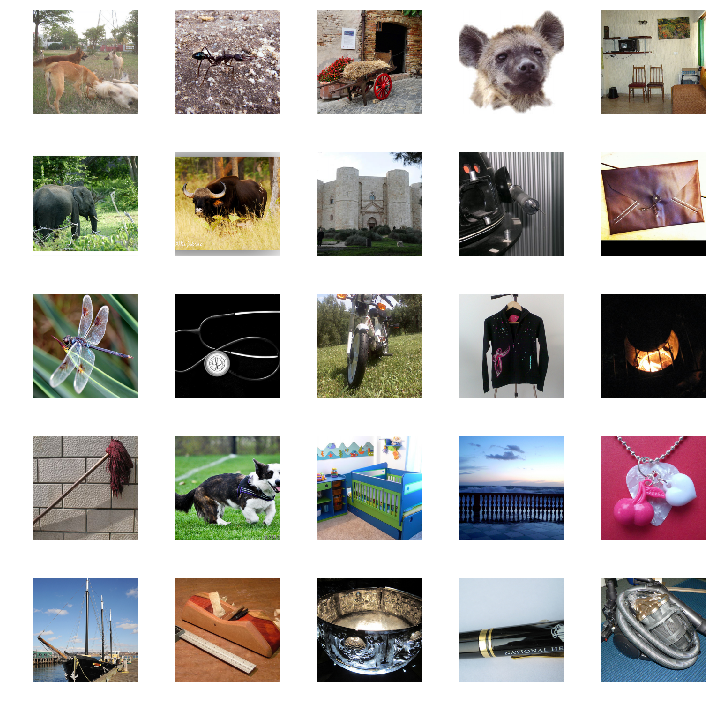

In [46]:
show_imgs(denorm(md.val_ds[start:start+25][0]), 5, (10,10))

In [47]:
import nmslib

def create_index(a):
    index = nmslib.init(space='angulardist')
    index.addDataPointBatch(a)
    index.createIndex()
    return index

def get_knns(index, vecs):
     return zip(*index.knnQueryBatch(vecs, k=10, num_threads=4))

def get_knn(index, vec): return index.knnQuery(vec, k=10)

In [48]:
nn_wvs = create_index(wvs)

In [49]:
idxs,dists = get_knns(nn_wvs, pred_wv)

In [61]:
[[classids[syns[id]] for id in ids[:3]] for ids in idxs[start:start+10]]

[['dingo', 'wombat', 'koala'],
 ['ant', 'bee', 'tarantula'],
 ['oxcart', 'hay', 'ox'],
 ['hyena', 'baboon', 'warthog'],
 ['projector', 'refrigerator', 'radiator'],
 ['tusker', 'impala', 'lion'],
 ['ox', 'bison', 'hog'],
 ['monastery', 'castle', 'church'],
 ['screwdriver', 'plunger', 'washer'],
 ['mailbag', 'wallet', 'backpack']]

### Search all wordnet noun classes

In [62]:
all_syns, all_wvs = list(zip(*syn2wv.items()))
all_wvs = np.array(all_wvs)

In [63]:
nn_allwvs = create_index(all_wvs)

In [64]:
idxs,dists = get_knns(nn_allwvs, pred_wv)

In [65]:
[[classids[all_syns[id]] for id in ids[:3]] for ids in idxs[start:start+10]]

[['dingo', 'wombat', 'koala'],
 ['ant', 'Myrmeleon', 'Myrmecia'],
 ['oxcart', 'ox', 'threshing'],
 ['hyena', 'Crocuta', 'baboon'],
 ['skylight', 'upstairs', 'refrigerator'],
 ['tusker', 'Kenyan', 'elephant'],
 ['ox', 'bison', 'boar'],
 ['monastery', 'nunnery', 'abbey'],
 ['screwdriver', 'screwdriver', 'plunger'],
 ['mailbag', 'mailbag', 'wallet']]

### Text -> image search

In [66]:
nn_predwv = create_index(pred_wv)

In [67]:
en_vecd = pickle.load(open(TRANS_PATH/'wiki.en.pkl','rb'))

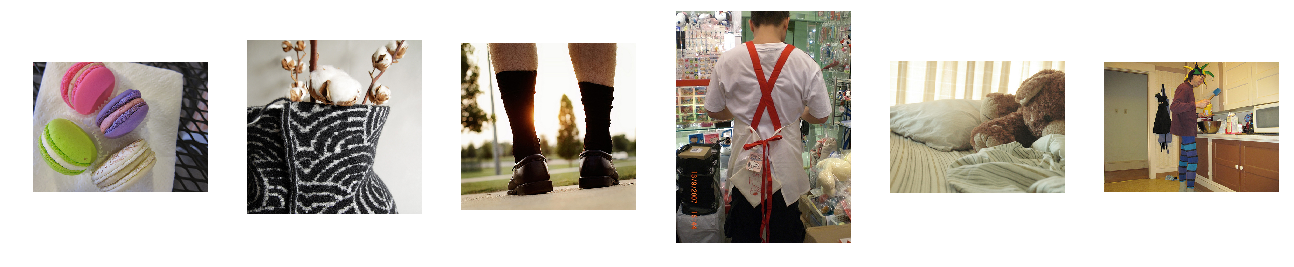

In [165]:
vec = en_vecd['tacky']
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:6]], 6, figsize=(18,6));

In [175]:
vec = en_vecd['monarch'] - en_vecd['butterfly'] + en_vecd['man'] 

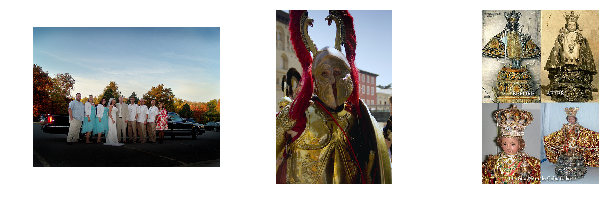

In [176]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3));

In [ ]:
vec = (en_vecd['beer'] + en_vecd['party'])/2

In [ ]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3));

### Image->image

In [ ]:
fname = 'val/ILSVRC2012_val_00007197.JPEG'

In [ ]:
img = open_image(PATH/fname)

In [ ]:
show_img(img);

In [ ]:
t_img = md.val_ds.transform(img)
pred = learn.predict_array(t_img[None])

In [ ]:
idxs,dists = get_knn(nn_predwv, pred)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[1:4]], 3, figsize=(9,3));